When your cursor is in a cell, hit "Shift+Enter" to run the code in that cell.
The code in the next cell below defines all of the major Metropolis Monte Carlo
components for the example in class on 01/27/2017. I have included example cells 
that call the run(kT,steps) function defined in the first cell, which performs a 
simulationat a specified kT for a number of steps.

Note: if you change code in the first cell, you'll need to "Shift+Enter" to 
communicate those changes to the Python kernel, and then you'll need to 
"Shift+Enter" in any cells where you'd like to see those changes propagated.
If you think you've messed everything up, download this file again and upload it to
codelab.boisestate.edu

I have also included some example plotting code in the bottom cell.

Here we have a model of five "particles" in a volume with ten "sites". A '1' in 
our system array indicates there's a particle there, and a '0' indicates the site
is empty. These particles are "attractive", in the sense that there is a negative
potential energy (-1 units of kT) associated with two particles being in adjacent
sites. 

HW Due Tuesday 01/31/2017 at 9:00am. Please save and hand in your updates to this 
iPython notebook, saved with your name "e.g., hw-mc1-jankowski.ipynb", uploaded
to blackboard.

    0.a How many distinguishable microstates does this system have?
        0.b What if there were twenty sites for the five "particles"?
        0.c What if there were fifteen particles and twenty sites?
    1. Using kT=1, experiment with different numbers of timesteps:
        1.a What is the average system energy at this temperature?
        1.b How does the standard deviation in the energy scale with the number of runs?
        1.c What is a practical upper limit for how long we should run a simulation?
    2. How does the average system of energy vary with T?
        2.a. Plot <E> for temperatures varying between 0.01 and 2.0
        2.b. Do any "interesting" temperatures stand out from these data? If so, why?
    3.a What is the most likely configuration at T=0.05?
    3.b and at T=3.0?
    4. How large of a system can you "equilibrate" with this code?
    5. What factors matter for how long a system takes to equilibrate?
    6. Is this code correct? If not, include your improvements in a new cell.


In [29]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
def energy(s):
    e = 0
    for i in range(len(s)-1):
        if s[i]==1:
            if s[i+1]==1:
                e-=1       #-1 energy for each pair of adjacent 1's
    return e

def trial_move(s): #randomly swap two positions in the system
    temp = numpy.copy(s)
    p1 = numpy.random.randint(0,len(s))
    p2 = numpy.random.randint(0,len(s))
    temp[p2], temp[p1] = temp[p1],temp[p2]
    return temp

def accept(de,kT): #implement detailed balance
    if numpy.exp(-de/kT) > numpy.random.rand():
        return True
    return False
        
def run(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*5) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
    return kT,e.mean(), e.std() #Return the temperature, average energy, and standard deviation

In [30]:
def num_microstates(n,r):
    return numpy.math.factorial(n)/(numpy.math.factorial(n-r)*numpy.math.factorial(r))

### Problem 0
    0.a How many distinguishable microstates does this system have?
        0.b What if there were twenty sites for the five "particles"?
        0.c What if there were fifteen particles and twenty sites?

In [27]:
print("There are {} distinguishable microstates for a system with 10 sites and 5 'particles'.".format(num_microstates(10,5)))
print("There are {} distinguishable microstates for a system with 20 sites and 5 'particles'.".format(num_microstates(20,5)))
print("There are {} distinguishable microstates for a system with 15 sites and 20 'particles'.".format(num_microstates(20,15)))


There are 252.0 distinguishable microstates for a system with 10 sites and 5 'particles'.
There are 15504.0 distinguishable microstates for a system with 20 sites and 5 'particles'.
There are 15504.0 distinguishable microstates for a system with 15 sites and 20 'particles'.


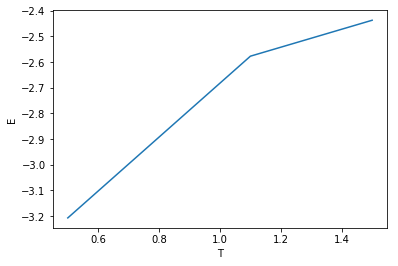

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
Temperatures = [0.5,1.1,1.5]
avgE = []
for T in Temperatures:
    t,a,s = run(T,1e5)
    avgE.append(a)
plt.xlabel("T")
plt.ylabel("E")
plt.plot(Temperatures,avgE)
plt.show() # If your plot doesn't appear after a little while (check if a window has appeared behind this) then you might try uncommenting this line and running again

### Problem 1
    1. Using kT=1, experiment with different numbers of timesteps:
        1.a What is the average system energy at this temperature?
        1.b How does the standard deviation in the energy scale with the number of runs?
        1.c What is a practical upper limit for how long we should run a simulation?

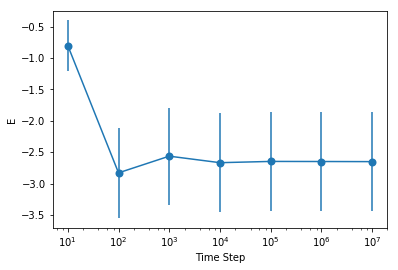

In [33]:
time_steps = [1e1,1e2,1e3,1e4,1e5,1e6,1e7]
avgE = []
std = []
for ts in time_steps:
    t,a,s = run(1.0,ts)
    avgE.append(a)
    std.append(s)
plt.xlabel("Time Step")
plt.ylabel("E")
plt.errorbar(time_steps,avgE,yerr=std, marker = 'o', markeredgewidth=0, markersize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.xscale('log')
plt.show()

#### 1.a
The average system energy is about -2.6 kT
#### 1.b
The standard deviation is a bit smaller for 1e1 ~ 0.5 kT, and goes to ~0.8 kT for runs     longer than 1e1. In the above plot, the standard deviation is represented by the "error bars"  on each data point
#### 1.c
The system seems to equilibrate after 1e4 timesteps, that is the average potential energy seems to stop changeing after running the simulation for 1e4 timesteps. A more conservitive upper limit would be 1e5 time steps

### Problem 2    
    2. How does the average system of energy vary with T?
        2.a. Plot <E> for temperatures varying between 0.01 and 2.0
        2.b. Do any "interesting" temperatures stand out from these data? If so, why?

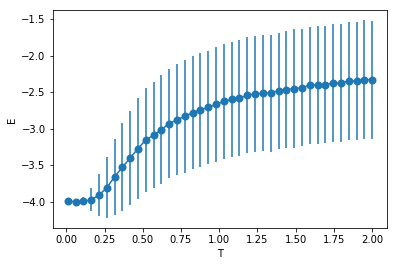

In [17]:
#2.a
Temperatures = numpy.linspace(0.01, 2.0, num=40)
avgE = []
std = []
for T in Temperatures:
    t,a,s = run(T,1e5)
    avgE.append(a)
    std.append(s)
plt.xlabel("T")
plt.ylabel("E")
plt.errorbar(Temperatures,avgE,yerr=std, marker = 'o', markeredgewidth=0, markersize=8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.show() 

#### 2.a
See above plot
#### 2.b
At T < 0.2, the system is "solid like" where all of the particles are clumped together. There seems to be a phase change between T > 0.2 and T < 0.75 where the potential energy rapidly increases to -3.0 kT. for T > 0.75, the potential seems to be arround -2.5 kT. This increase in potential energy occurs at a much slower rate the the T > 0.2 and T < 0.75 regime


### Problem 3    
####    3.a What is the most likely configuration at T=0.05?
From #2.a we can see that the system energy at T=0.05 is -4.0, which corresponds to a system where all of the particles are next to each other.
#### 3.b and at T=3.0?
At T=3.0, the partilces will be randomly ordered since the probability of accepting a move that increases the system energy is ~71%.
### Problem 4       
#### How large of a system can you "equilibrate" with this code?
There are two considerations for determining how large of a system we can equilibrate. First, with large systems, our code may crash or have overflow problems. These can be sloved with proper coding practices. The second problem is as our system gets larger, our code will take longer to run since our energy calculation scales O(Number of Sites). This scaling can be seen with the plot below. However, as the system size gets larger, equilibration time will also increase. The TPS of this code is roughly 33k, so depending on how long you are willing to wait, you can run a large system. However, I found that anything over 1e9 or larger for system size had a memory error (4gb).
#### What factors matter for how long a system takes to equilibrate?
One factor is the system density. If the system has 100's of sites but only, say, 5 particles, and the system is initialized randomly, then it will take a long time for the system to randomly move the particles together, even at a low temperature, since many trial moves will just swap a 0 with a 0. Another factor is the temperature. At high temperature, the system will equilibrate quickly since most moves will be accepted and it will not take long for the system to becom randomly ordered. At low temperatures the system could find itself in a local minimum and take a long time to find the global minimum since the temperature could be too low for it to escape this 'kinect trap'. 
### Problem 6   
#### Is this code correct? If not, include your improvements in a new cell.
I belive the code is correct. It could be more flexable and take into consideration perodic boundary conditions. It could also check to see if the swap won't change the energy (1,1 or 0,0 swap) and save time by not re-calculating the system energy.

In [80]:
def run10(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*50) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
    return kT,e.mean(), e.std() #Return the temperature, average energy, and standard deviation
def run100(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*500) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
    return kT,e.mean(), e.std() #Return the temperature, average energy, and standard deviation

In [77]:
%timeit run(1.0, 1e5)

1 loop, best of 3: 3 s per loop


In [79]:
%timeit run10(1.0, 1e5)

1 loop, best of 3: 11.4 s per loop


In [81]:
%timeit run100(1.0, 1e5)

1 loop, best of 3: 1min 42s per loop


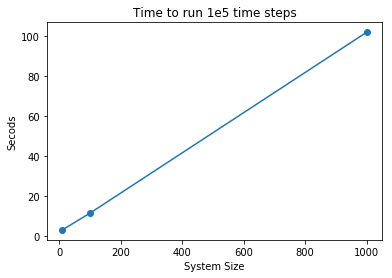

In [85]:
plt.plot([10, 100, 1000], [3, 11.4, 60+42], marker = "o")
plt.title("Time to run 1e5 time steps")
plt.xlabel("System Size")
plt.ylabel("Secods")
plt.show()

In [121]:
def runINF(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*int(1e9)) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
    return kT,e.mean(), e.std()

In [122]:
%timeit runINF(1,1)

MemoryError: 

In [118]:
#System Size 1e6
%reload_ext memory_profiler
%memit runINF(1,1)

peak memory: 442.49 MiB, increment: 345.28 MiB
